# Assignment 4 (Forest Cover)

- Name: **Arnab Sen**
- Roll: **510519006**
- Date: **Sept 5, 2022**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_4/dataset'

Mounted at /content/drive


In [4]:
dataset = pd.read_csv(f"{BASE_PATH}/covtype.csv")
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)

Dataset shape: (581012, 55)
Dataset columns: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soi

In [6]:
scaled_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

for col in scaled_cols:
    scaler = StandardScaler()
    dataset[[col]] = pd.DataFrame(
        data=scaler.fit_transform(dataset[[col]]),
        index=dataset.index,
        columns=[col]
    )

dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,0,0,0,0,0,0,0,0,0,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,0,0,0,0,0,0,0,0,0,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,0,0,0,0,0,0,0,0,0,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,0,0,0,0,0,0,0,0,0,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,0,0,0,0,0,0,0,0,0,5


In [7]:
dataset['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [10]:
dataset = dataset.sample(frac=0.1)
X = dataset.drop('Cover_Type', axis=1)
y = dataset['Cover_Type']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
# Helper function to display confusion matrix
def display_confusion_matrix(X_test, y_test, model):
    y_predict = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_predict)
    fig = plt.figure(figsize=(10,10))
    sns.heatmap(
        matrix, 
        xticklabels=range(1,8),
        yticklabels=range(1,8),
        linewidth=0.5, 
        cmap='coolwarm', 
        annot=True, 
        cbar=True,
        square=True)
    plt.title('HeatMap for the model')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
    plt.show()


In [13]:
shapes = ['ovo', 'ovr']

models = [
    SVC(decision_function_shape=shape).fit(X_train, y_train)
    for shape in shapes
]


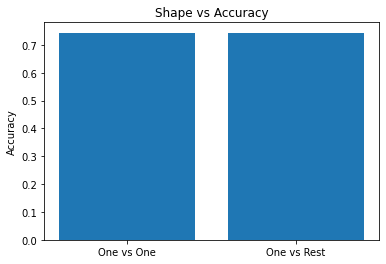

In [14]:
accuracies = [model.score(X_test, y_test) for model in models]

plt.bar(range(0, len(accuracies)), accuracies)
plt.title('Shape vs Accuracy')
plt.ylabel('Accuracy')
plt.xticks(ticks=[0,1], labels=['One vs One', 'One vs Rest'])
plt.show()


In [ ]:
print(pd.DataFrame(columns=['Shape', 'Accuracy'],
             data=zip(shapes, accuracies)))


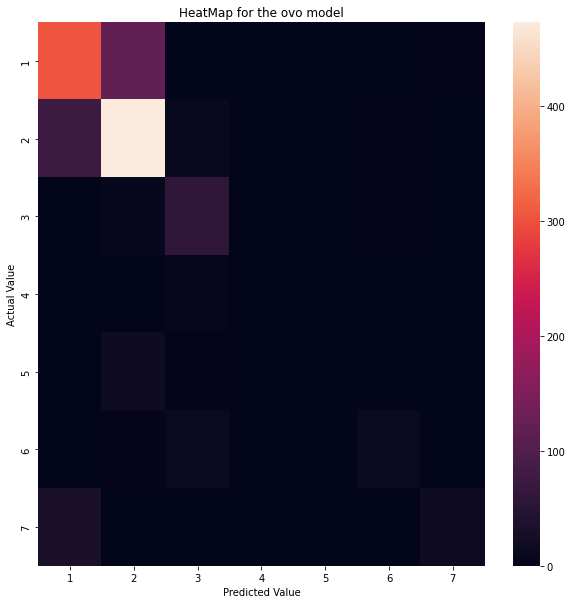

In [16]:
y_pred = models[0].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    cm, 
    xticklabels=range(1,8),
    yticklabels=range(1,8)
)
plt.title(f'HeatMap for the {shapes[0]} model')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

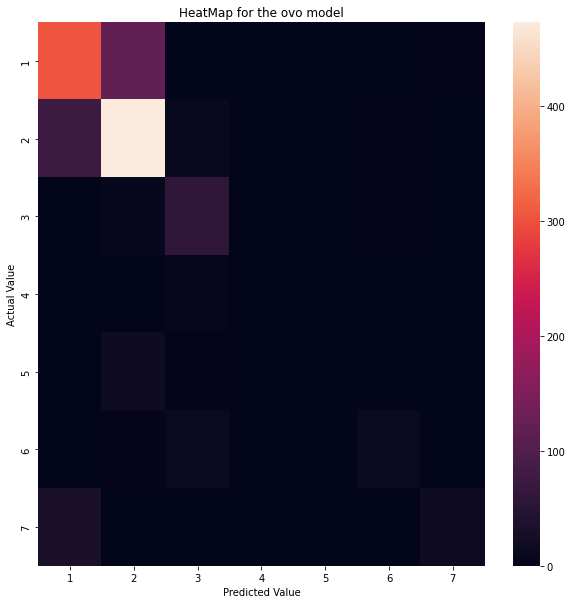

In [17]:
y_pred = models[0].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    cm, 
    xticklabels=range(1,8),
    yticklabels=range(1,8)
)
plt.title(f'HeatMap for the {shapes[0]} model')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()